In [5]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set(style='ticks', font_scale=1.5)

In [6]:
group_info = pd.read_csv('/Volumes/group/awagner/sgagnon/SST/scripts/subjects_groups.csv')
group_info.head()

,subid,group,remove
0,sst01,control,1.0
1,sst02,control,1.0
2,sst03,control,NaN
3,sst04,control,NaN
4,sst05,control,NaN


In [7]:
filepath='/Volumes/group/awagner/sgagnon/SST/nav_data/route_coding_sarah.csv'
d = pd.read_csv(filepath)
d.head()

,subid,env,run_type,rep,code1,coder
0,sst01,1,habit,1,habit,sarah
1,sst01,1,shortcut,1,other,sarah
2,sst01,1,shortcut,2,habit,sarah
3,sst01,2,habit,1,habit,sarah
4,sst01,2,shortcut,1,habit,sarah


In [78]:
d.groupby(['subid']).mean().env.value_counts()

6.5    37
Name: env, dtype: int64

In [8]:
d = d.loc[d.code1 != 'NO MAP SHOWN',:]
codes = d.code1.unique(); codes

array(['habit', 'other', 'backtrack', 'shortcut', nan], dtype=object)

In [38]:
data = d.groupby(['subid', 'run_type', 'rep', 'code1']).count().reset_index()
data = pd.pivot_table(data, index=['subid', 'run_type', 'rep'], columns='code1', values='env', fill_value=0).reset_index()
print data.shape
data.head()

(110, 7)


code1,subid,run_type,rep,backtrack,habit,other,shortcut
0,sst01,habit,1,0,4,7,1
1,sst01,shortcut,1,0,9,2,1
2,sst01,shortcut,2,2,7,2,1
3,sst02,habit,1,0,9,3,0
4,sst02,shortcut,1,2,4,1,5


In [39]:
data_counts = d.groupby(['subid', 'run_type', 'rep']).count().reset_index()
print data_counts.shape
data_counts.head()

(111, 6)


,subid,run_type,rep,env,code1,coder
0,sst01,habit,1,12,12,12
1,sst01,shortcut,1,12,12,12
2,sst01,shortcut,2,12,12,12
3,sst02,habit,1,12,12,12
4,sst02,shortcut,1,12,12,12


In [40]:
data['total_trials'] = data_counts.env
data.head()

code1,subid,run_type,rep,backtrack,habit,other,shortcut,total_trials
0,sst01,habit,1,0,4,7,1,12
1,sst01,shortcut,1,0,9,2,1,12
2,sst01,shortcut,2,2,7,2,1,12
3,sst02,habit,1,0,9,3,0,12
4,sst02,shortcut,1,2,4,1,5,12


In [51]:
d1 = data.loc[:,codes[:4]]
d2 = data.loc[:,'total_trials']
proportions = d1.divide(d2, axis='rows')
proportions.head()

code1,habit,other,backtrack,shortcut
0,0.333333,0.583333,0.000000,0.083333
1,0.750000,0.166667,0.000000,0.083333
2,0.583333,0.166667,0.166667,0.083333
3,0.750000,0.250000,0.000000,0.000000
4,0.333333,0.083333,0.166667,0.416667


In [52]:
proportions[['subid', 'run_type', 'rep']] = data[['subid', 'run_type', 'rep']]
proportions.head()

code1,habit,other,backtrack,shortcut,subid,run_type,rep
0,0.333333,0.583333,0.000000,0.083333,sst01,habit,1
1,0.750000,0.166667,0.000000,0.083333,sst01,shortcut,1
2,0.583333,0.166667,0.166667,0.083333,sst01,shortcut,2
3,0.750000,0.250000,0.000000,0.000000,sst02,habit,1
4,0.333333,0.083333,0.166667,0.416667,sst02,shortcut,1


In [53]:
proportions = pd.melt(proportions, id_vars=['subid', 'run_type', 'rep'])
proportions.head()

,subid,run_type,rep,code1,value
0,sst01,habit,1,habit,0.333333
1,sst01,shortcut,1,habit,0.750000
2,sst01,shortcut,2,habit,0.583333
3,sst02,habit,1,habit,0.750000
4,sst02,shortcut,1,habit,0.333333


In [58]:
proportions = proportions.merge(group_info)

In [60]:
proportions.head()

,subid,run_type,rep,code1,value,group,remove
0,sst01,habit,1,habit,0.333333,control,1.0
1,sst01,shortcut,1,habit,0.750000,control,1.0
2,sst01,shortcut,2,habit,0.583333,control,1.0
3,sst01,habit,1,other,0.583333,control,1.0
4,sst01,shortcut,1,other,0.166667,control,1.0


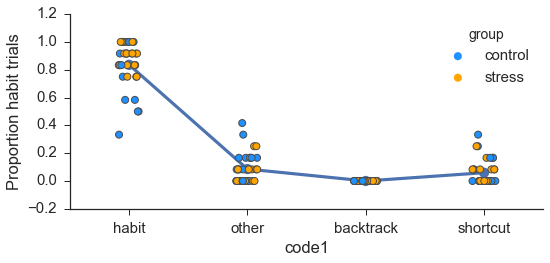

In [70]:
data = proportions.loc[(proportions.run_type =='habit') & (~proportions.subid.isin(['sst01', 'sst02']))]

sns.factorplot(x='code1', y='value', 
               ci=68, units='subid', data=data, aspect=2)
sns.stripplot(x='code1', y='value', jitter=True, hue='group', 
              palette=['dodgerblue', 'orange'],size=7,linewidth=1,
               data=data)

plt.ylabel('Proportion habit trials')

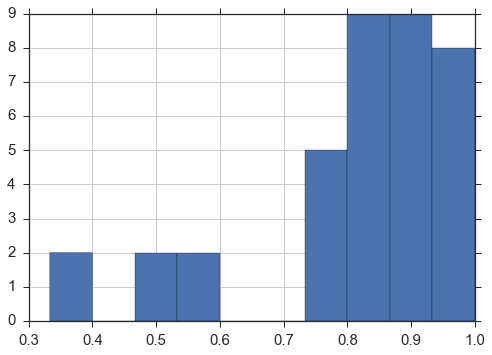

In [74]:
proportions.loc[(proportions.run_type=='habit') & 
                (proportions.code1 == 'habit'), 'value'].hist()

In [65]:
proportions.loc[(proportions.run_type=='habit') & 
                (proportions.code1 == 'habit') & 
                (proportions.value < .5)]

,subid,run_type,rep,code1,value,group,remove
0,sst01,habit,1,habit,0.333333,control,1.0
216,sst21,habit,1,habit,0.333333,control,NaN


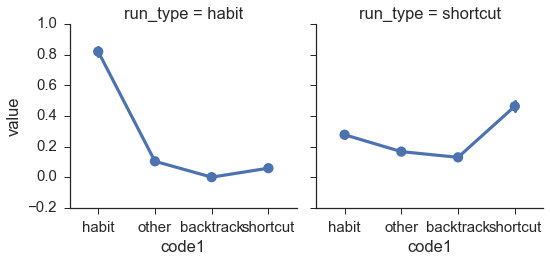

In [26]:
sns.factorplot(x='code1', y='value', col='run_type',
               ci=68, units='subid', data=proportions)

,subid,run_type,code1,value
0,sst01,habit,habit,0.333333
36,sst21,habit,habit,0.333333


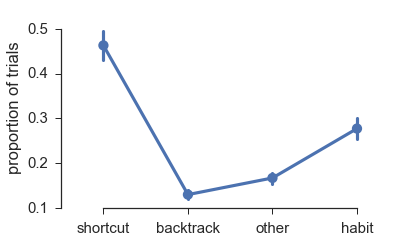

In [28]:
x_order = ['shortcut', 'backtrack', 'other', 'habit']

p = sns.factorplot(x='code1', y='value', order=x_order,
                   ci=68, units='subid', aspect=1.5,
                   data=proportions.loc[proportions.run_type == 'shortcut'])
p.set_xlabels('')
p.set_ylabels('proportion of trials')
sns.despine(trim=True)
# plt.savefig('/Volumes/group/awagner/sgagnon/SST/nav_data/group/results/shortcut_choices.png', dpi=300)

In [79]:
data.merge(group_info).mean()

rep       1.000000
value     0.245238
remove         NaN
dtype: float64

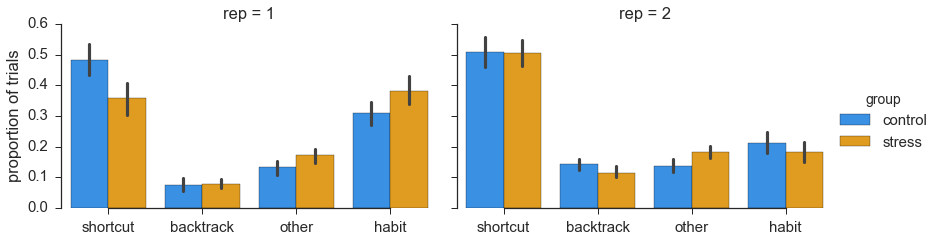

In [83]:
data = proportions.loc[proportions.run_type == 'shortcut']

p = sns.factorplot(x='code1', y='value', hue='group',col='rep',
                   ci=68, units='subid', order=x_order, kind='bar',
                   aspect=1.5, dodge=.1, palette=['dodgerblue', 'orange'],
                   data=data.merge(group_info))
p.set_xlabels('')
p.set_ylabels('proportion of trials')
sns.despine(trim=True)
# plt.savefig('/Volumes/group/awagner/sgagnon/SST/nav_data/group/results/shortcut_choices_bygroup.png', dpi=300)